In [1]:
include("DG_Functions.jl")
include("Specific_DG_Functions.jl")
include("DG_Methods.jl")
include("Differentiation.jl")
include("DG_Derivative.jl")
include("DG_Derivative_Matrix.jl")

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
function Runge-Kutta(order::Int, f::Function, y::Real, t::Real, dt::Real)
   
    return y+f(t,y)*dt
end

function time_evolve(coeffs::Dict{CartesianIndex{D}, Array{Array{Float64},D}},
    coeffs_dot::Dict{CartesianIndex{D}, Array{Array{Float64},D}},dt::Real)
    
    for key in keys(coeffs)
        ks = ntuple(i -> 1<<pos(key[i]-2), D) 
        for place in CartesianRange(ks)
            for f_number in CartesianRange(f_numbers)
                coeffs[key][place][f_number] += coeffs_dot[key][place][f_number]*dt
            end
        end
    end
end

LoadError: LoadError: syntax: expected "end" in definition of function "Runge"
while loading In[3], in expression starting on line 1

In [10]:
func = (x-> sin(pi*x[1]))
coeffs=hier_coefficients_DG(4,func,(6,))
dcoeffs=diff_coefficients_DG(1,4,coeffs)
ddcoeffs = diff_coefficients_DG(1,4,dcoeffs)

Dict{CartesianIndex{1},Array{Array{Float64,N},1}} with 6 entries:
  CartesianIndex{1}((3,)) => Array{Float64,N}[[-0.0002648093403021976,0.0050572…
  CartesianIndex{1}((5,)) => Array{Float64,N}[[-2.795660012478278e-5,6.16948148…
  CartesianIndex{1}((2,)) => Array{Float64,N}[[2.2557562913937124e-12,0.1489983…
  CartesianIndex{1}((6,)) => Array{Float64,N}[[-3.45632060797279e-5,8.406754991…
  CartesianIndex{1}((1,)) => Array{Float64,N}[[-6.2846275388096124,8.3222715828…
  CartesianIndex{1}((4,)) => Array{Float64,N}[[-2.6464182432550318e-5,0.0001630…

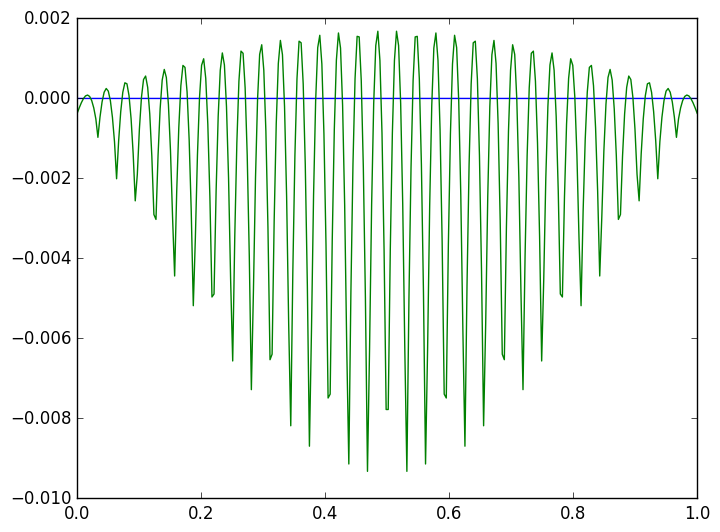

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bff9990>

In [11]:
plotfunc1D(x-> reconstruct_DG(4,coeffs,[x[1]])-sin(pi*x[1]))
plotfunc1D(x-> reconstruct_DG(4,ddcoeffs,[x[1]])+pi^2*sin(pi*x[1]))

In [17]:
reconstruct_DG(4,ddcoeffs,[0.0]), reconstruct_DG(4,coeffs,[0.0])

(-0.00037045812358504047,-2.41168234690149e-9)